In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


# UNZIP THE DATASET

In [ ]:
import zipfile
zip= zipfile.ZipFile("/content/dogs-vs-cats.zip","r")
zip.extractall("/content")
zip.close()

# IMPORT ALL LIBRARIES

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization

# CUSTOM CODE WITH OS OR USE A GENERATOR FOR TRAVERSAL OF THE IMAGE DATASET

**generator**

In [ ]:
train=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int' , #cat=0,dog=1
    batch_size=32,
    image_size=(256,256)  #so that size of all images is same
)

test=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int' , #cat=0,dog=1
    batch_size=32,
    image_size=(256,256)  #so that size of all images is same
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


# NORMALIZING THE PIXEL VALUES

In [ ]:
def norm(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train= train.map(norm)
test=test.map(norm)

# CNN

In [ ]:
model= Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_6 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_7 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [ ]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
history=model.fit(train,epochs=10,validation_data=test)

Epoch 1/10
625/625 [==============================] - 69s 105ms/step - loss: 1.2734 - accuracy: 0.5534 - val_loss: 0.7095 - val_accuracy: 0.5800
Epoch 2/10
625/625 [==============================] - 66s 104ms/step - loss: 0.6320 - accuracy: 0.6492 - val_loss: 0.5905 - val_accuracy: 0.7032
Epoch 3/10
625/625 [==============================] - 66s 104ms/step - loss: 0.5191 - accuracy: 0.7434 - val_loss: 0.5023 - val_accuracy: 0.7518
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4419 - accuracy: 0.7937 - val_loss: 0.4841 - val_accuracy: 0.7732
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3896 - accuracy: 0.8213 - val_loss: 0.5157 - val_accuracy: 0.7556
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3350 - accuracy: 0.8506 - val_loss: 0.4835 - val_accuracy: 0.7578
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2722 - accuracy: 0.8810 - val_loss: 0.4331 - val_ac

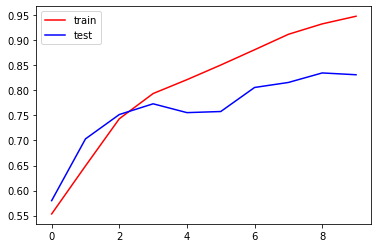

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

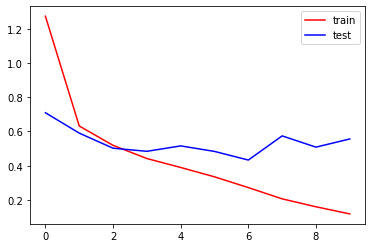

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()

ways to reduce overfitting


1.   add more data
2.   Data AUG(creating synthetic data)
1.   Batch Nomralization
2.   Dropout
1.   L1/L2 Reg







In [ ]:
import cv2

In [ ]:
test1= cv2.imread("/content/dog.jfif")

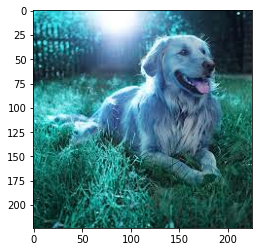

In [ ]:
plt.imshow(test1)

In [ ]:
test1.shape

(224, 225, 3)

In [ ]:
test1= cv2.resize(test1,(256,256))

In [ ]:
test_inp= test1.reshape((1,256,256,3)) # 1 img of dimen 256 256 3

In [ ]:
model.predict(test_inp)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)